# Social Media Analytics Homework 2
#### *Siqi Chen (sc56839), Yuxin Li (yl24344), Gabriella Lio (gkl239), Jiahao Ye (jy7769), Boying You (by3475)*

In [1]:
import os
import pandas as pd
import numpy as np
from gensim import corpora, models
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


### Pre-process speeches
#### *read, tokenize, stemmize, remove stopwords*

In [2]:
dates = []
names = []
speeches = []
tokenizer = RegexpTokenizer(r'\w+')
stopword = stopwords.words('english')
p_stem = PorterStemmer()
wn_lemma = WordNetLemmatizer()
for file in os.listdir("data"):
    if file.endswith(".txt"):
        dates.append(file[:10])
        names.append(file[11:-4])
        with open(os.path.join("data", file), encoding='utf-8',errors='ignore') as f:
            lines = f.readlines()
            text = (' ').join([line.strip() for line in lines])
            tokens = tokenizer.tokenize(text)
            tokens_stop = [t.lower() for t in tokens if t.lower() not in stopword]    
            tokens_lemma = [wn_lemma.lemmatize(t) for t in tokens_stop]
        speeches.append(tokens_lemma)

In [3]:
n = len(speeches)

## Task A - Choose number of topics

**We started with 20 topics because the data has a span of 200 years. We believe it is reasonable to extract 1 toppic per decade. We decided to use time span instead of number of presidents to choose the number of topics because at the beginning of US history, a few presidents spent unequal time in office.**

**After trying out the model with 20 topics, we adjusted the number of topics to 15 to examine a different result. It turned out with 15 topics some valuable insights are missed. With more topics, the level of complexity weakens the interpretability. Thus, we decided to stick with 20 topics.**

## Task B - LDA

### Contruct document term matrix

In [4]:
dictionary = corpora.Dictionary(speeches)
#convert speeches to word vectors
corpus = [dictionary.doc2bow(speech) for speech in speeches]

In [5]:
lda = models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20, random_state = 3)

In [6]:
top_words = []
for i in range(20):
    top_words.append(tuple([w for (w,prob) in lda.show_topic(i)]))
topics = pd.DataFrame(top_words)

#### The following table shows the top 10 words associated with each of the 20 topics.

In [7]:
topics #can modify

,0,1,2,3,4,5,6,7,8,9
0,religious,church,catholic,president,public,would,believe,kind,office,protestant
1,government,men,boat,gun,help,always,northwest,people,security,woman
2,government,state,upon,country,increase,question,people,would,slavery,federal
3,state,united,law,government,people,day,justice,court,judge,president
4,people,think,president,mr,going,say,year,would,want,health
5,government,people,upon,state,law,country,would,power,must,great
6,state,government,united,may,country,congress,upon,power,citizen,great
7,iraq,iraqi,africa,troop,war,new,qaida,end,ghana,terrorist
8,war,would,president,people,mr,u,think,american,one,world
9,congress,people,republican,bill,party,time,democratic,platform,country,labor


#### Based on the top 10 words associated with each topic, we summarized them as follows

- **topic 0: religion**
- **topic 1: national security**
- **topic 2: slavery**
- **topic 3: judiciary**
- **topic 4: Medicare**
- **topic 5: law and trust**
- **topic 6: federal power**
- **topic 7: terrorism**
- **topic 8: cold war**
- **topic 9: seperation of powers**
- **topic 10: job and sociental stability**
- **topic 11: treaty**
- **topic 12: peace and war**
- **topic 13: race equality**
- **topic 14: national pride**
- **topic 15: tax act**
- **topic 16: festive holiday speech**
- **topic 17: nuclear and foreign policy**
- **topic 18: new bill**
- **topic 19: economy development**

#### After the 20 topics were found, we converted the speeches to topic vectors (distribution of topics in each speech)

In [8]:
#convert speeches to topic vectors
speeches_lda = [lda[c] for c in corpus]
#get topic distribution
topics_dist = {}
for i in range(20):
    topics_dist[i] = [0]*n
for i,s in enumerate(speeches_lda):
    for t in s:
        topics_dist[t[0]][i] = t[1]
#convert to df
topics_dist_df = pd.DataFrame(topics_dist, index = dates)

In [9]:
topics_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1789-04-30,0.0,0.00000,0.0,0.000000,0.0,0.534974,0.460611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1789-10-03,0.0,0.00000,0.0,0.628554,0.0,0.016998,0.350301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1790-01-08,0.0,0.00000,0.0,0.078120,0.0,0.013812,0.905943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1790-12-08,0.0,0.04907,0.0,0.000000,0.0,0.000000,0.949510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1790-12-29,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.644541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055391,0.0,0.290413,0.0


#### We splitted the topics into two parts (10 each) and plotted the topics' distributions in time order. 

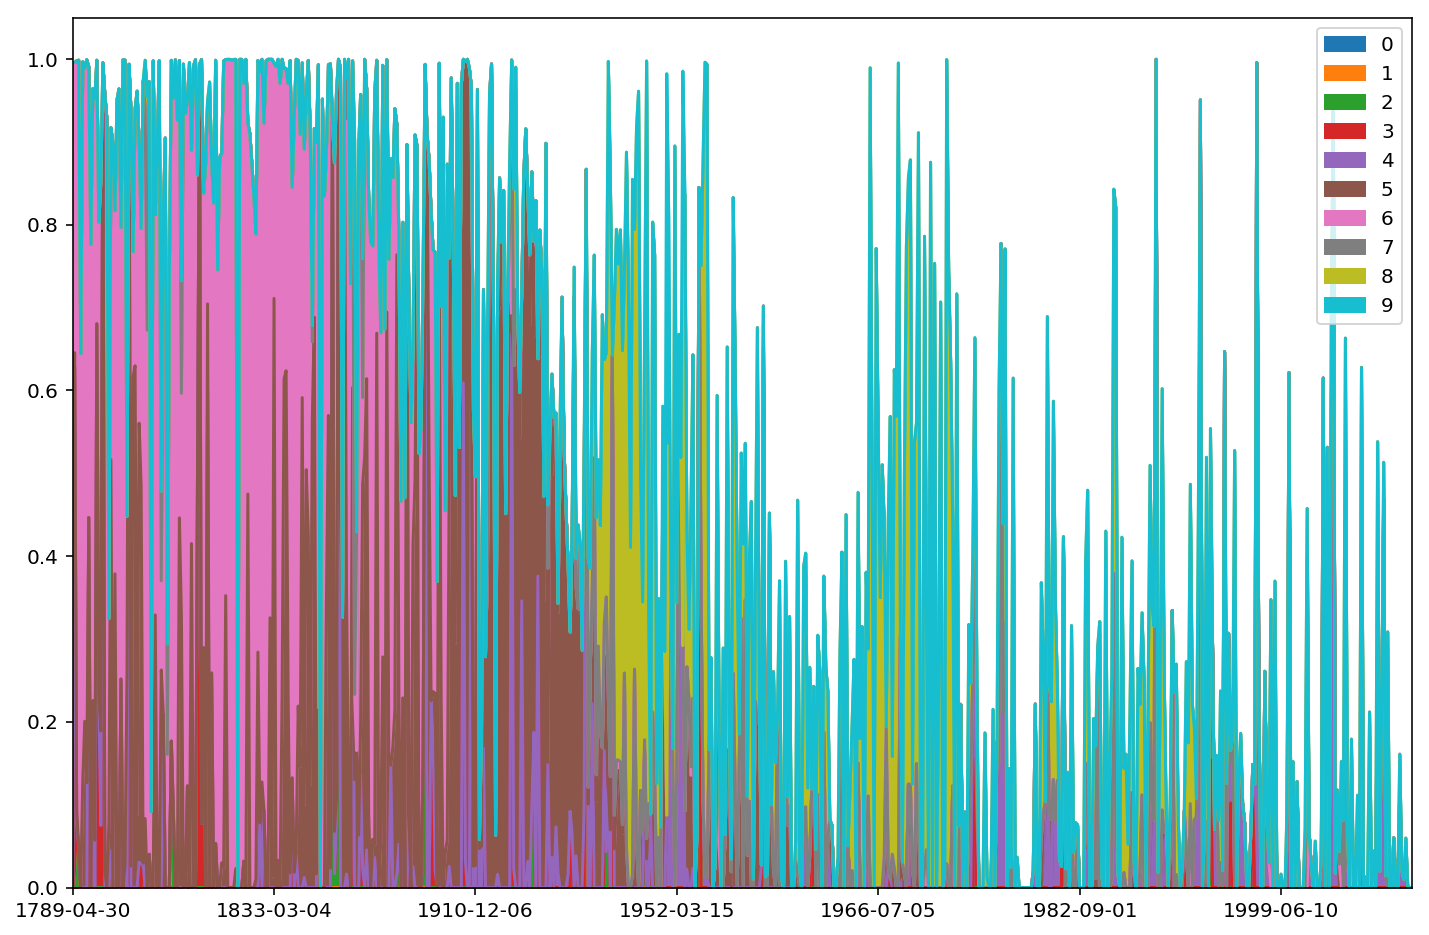

In [10]:
topics_dist_df.iloc[:,:10].plot(figsize = (12,8), kind = 'area', )

**Topic 6 (*federal power*) and 9 (*seperation of powers*) dominated late 1700s and early 1800s as the country was in its early stage of establishment.**

**Discussions of topic 6 (*federal power*) continued throughout 1900s while topic 5 (*law and trust*) peaked during early 1900s and topic 8 (*cold war*) popped up post WWII.**

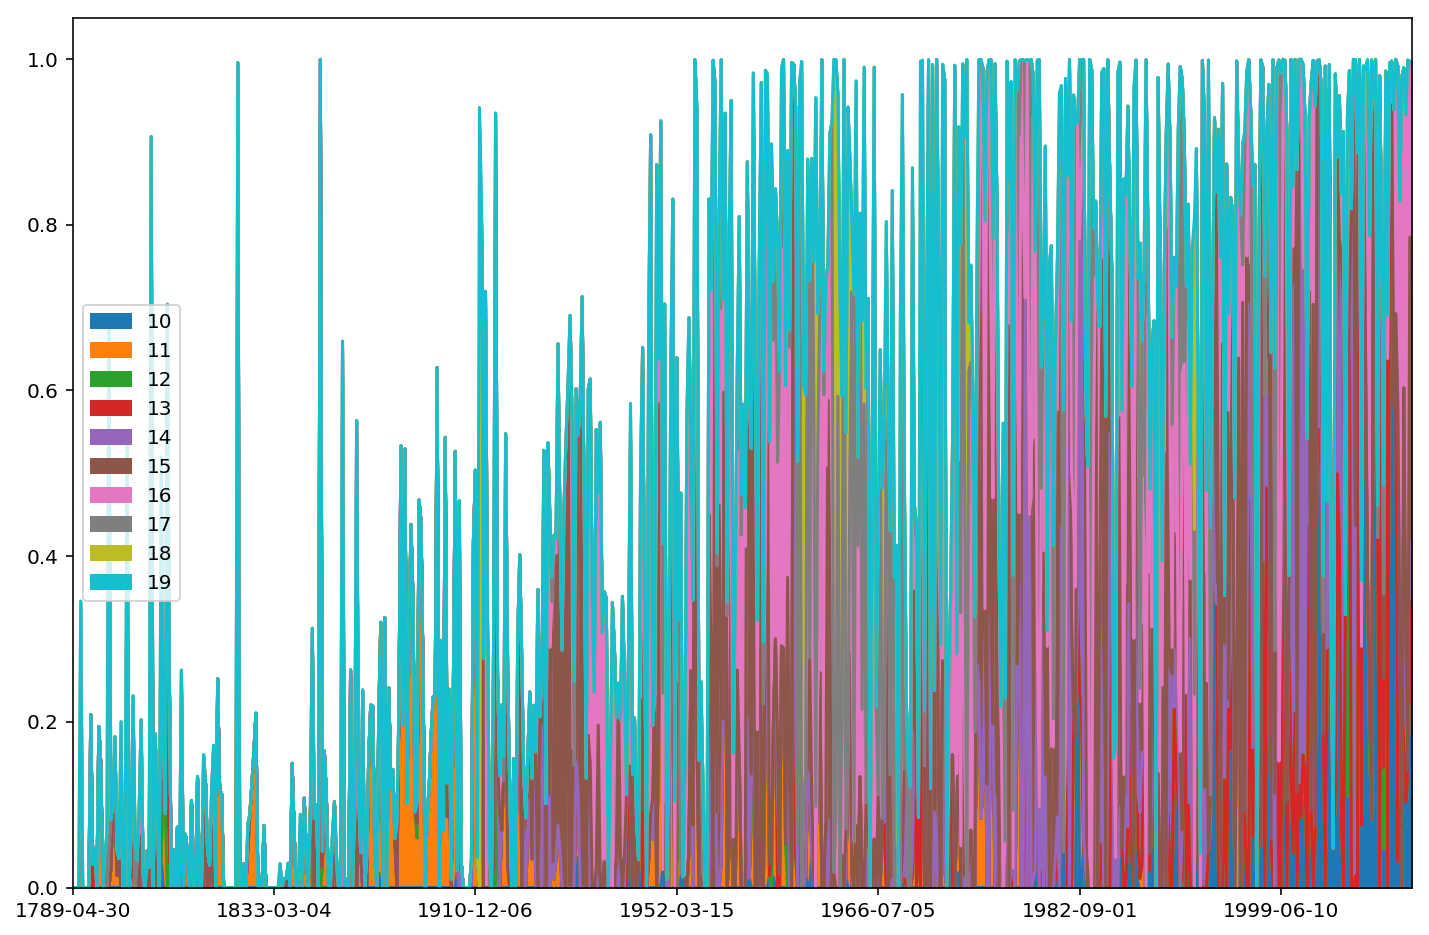

In [11]:
topics_dist_df.iloc[:,10:].plot(figsize = (12,8),kind = 'area')

**An increasing trend was found for discussions of topic 19 (*economy development*) since late 1700s.**

**Topic 15 (*tax act*) and 16 (*festive holiday speech*) were also heavily emphasized since 1900s.**

## Task C - Similarity with Donald Trump

#### We first grouped the topic vectors by speakers (presidents), then calculated the mean value of topic distribution for each speaker.

In [12]:
topics_dist_df['speaker'] = names
topics_speaker_df = topics_dist_df.groupby(['speaker'])[list(range(20))].mean()

#### After calculating the mean distribution of topics for each speaker, we calculated the correlation between each speakers, and found the top 3 speakers with highest correlation with Donald Trump.

In [13]:
speaker_corr = topics_speaker_df.T.corr()
speaker_corr['Donald Trump'].sort_values(ascending = False)[1:4]

speaker
Bill Clinton         0.879864
Barack Obama         0.788763
George H. W. Bush    0.645974
Name: Donald Trump, dtype: float64

#### As shown, Bill Clinton, Barack Obama, George H. W. Bush are the top correlated speakers with Donald Trump.

## Task D - Shift in Donald Trump's speeches

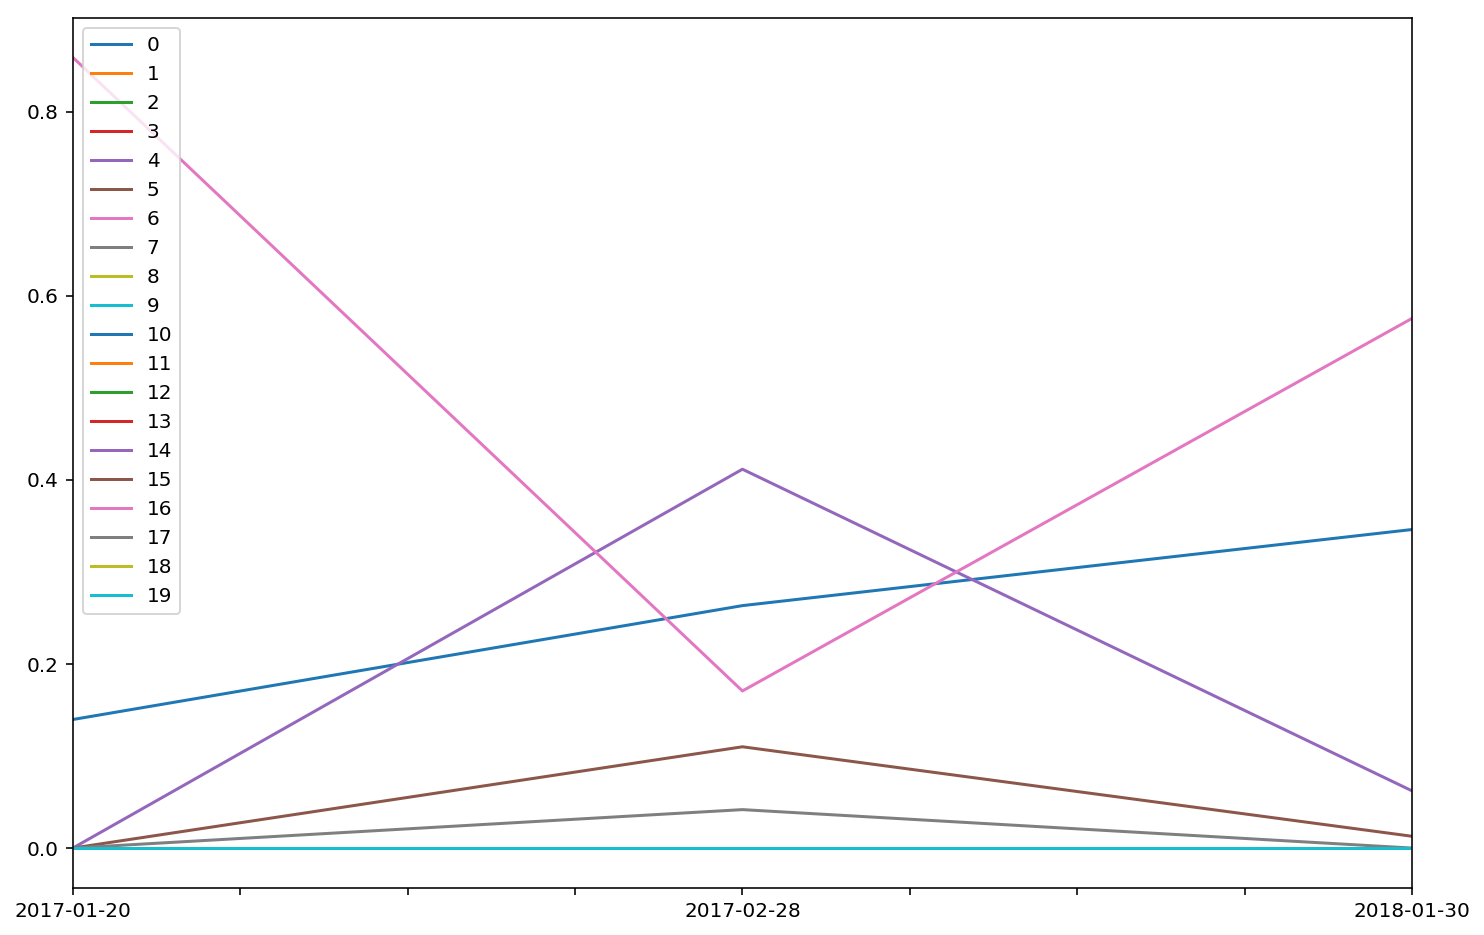

In [14]:
topics_dist_df.iloc[-3:,:20].plot(figsize = (12,8))

**Topic 16 (*festive holiday speech*) was heavily focused on for speeches in January. **

**Topic 14 (*national pride*) was the main topic mentioned for the speech in Febuaray 2017 but wasn't mentioned as much for other speeches.**

**Topic 10 (*job and sociental stability*), which is one of the key campaign ideas for Donald Trumps presidency, was mentioned in a stably increasing trend since January 2017.**

**Topic 15 (*tax act*), another key campaign ideas for Donald Trump, wasn't heavily focused on, but seem to be inevitable for Mr. Trump's speeches.**

**Topic 17 (*nuclear and foreign policy*) and topic 19 (economy development) kind of acted as the foundamentals for all the speeches.**

## Task E - Clustering

#### We first combined speeches for each speaker (president) into single corpus

In [15]:
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.util import cosine_distance
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [16]:
speeches_sent = [' '.join(s) for s in speeches]
speeches_sent_df = pd.DataFrame({'speaker': names, 'speech': speeches_sent})
speeches_sent_df.speech = speeches_sent_df.speech.apply(lambda x: x + ' ')
speeches_speaker_df = speeches_sent_df.groupby(['speaker'])[['speech']].sum()

In [17]:
speeches_speaker_df.head()

,speech
speaker,
Abraham Lincoln,honor henry clay fourth day july 1776 people f...
Andrew Jackson,fellow citizen undertake arduous duty appointe...
Andrew Johnson,fellow citizen senate house representative exp...
Barack Obama,chairman dean great friend dick durbin fellow ...
Benjamin Harrison,fellow citizen constitutional legal requiremen...


#### We applied TF-IDF vectorization, then performed k-means (k=20) clustering using cosine distance 

In [18]:
tfidf = TfidfVectorizer(stop_words='english')

In [43]:
X = tfidf.fit_transform(speeches_speaker_df.speech).toarray()
kmeans = KMeansClusterer(20, distance=cosine_distance, repeats=50)
clusters = kmeans.cluster(X, assign_clusters=True)

In [44]:
speakers = speeches_speaker_df.index.tolist()
similar_speakers = [speakers[i] for i,c in enumerate(clusters) if (c == clusters[8]) and (i != 8)]
print(similar_speakers)

['Barack Obama', 'Bill Clinton', 'George W. Bush']


**The clustering result shows that Barack Obama, Bill Clinton, George W. Bush are in the same cluster as Donald Trump, which is very similar to the result from LDA.**

## Task F - Visulization of Clustering

**We first constructed the consine similarity matrix using TF-IDF matrix. Then we computed the distance between each speaker as 1/(consine similarity + 0.001) and projected the matrix to a two dimensional plane through MDS.**

In [45]:
from sklearn import manifold

In [46]:
cosine_matrix = cosine_similarity(X)
for i in range(len(speakers)):
    for j in range(len(speakers)):
        cosine_matrix[i][j] = 1/(cosine_matrix[i][j] + 0.001)

In [47]:
cosine_matrix

array([[ 0.999001  ,  1.44940259,  1.52726608, ...,  1.64838776,
         1.62391658,  2.6319791 ],
       [ 1.44940259,  0.999001  ,  1.50680511, ...,  1.45128146,
         1.63283342,  2.30990452],
       [ 1.52726608,  1.50680511,  0.999001  , ...,  1.85713428,
         2.11542103,  3.17527355],
       ..., 
       [ 1.64838776,  1.45128146,  1.85713428, ...,  0.999001  ,
         1.59363436,  2.74406174],
       [ 1.62391658,  1.63283342,  2.11542103, ...,  1.59363436,
         0.999001  ,  2.56770285],
       [ 2.6319791 ,  2.30990452,  3.17527355, ...,  2.74406174,
         2.56770285,  0.999001  ]])

In [48]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=1,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(cosine_matrix).embedding_

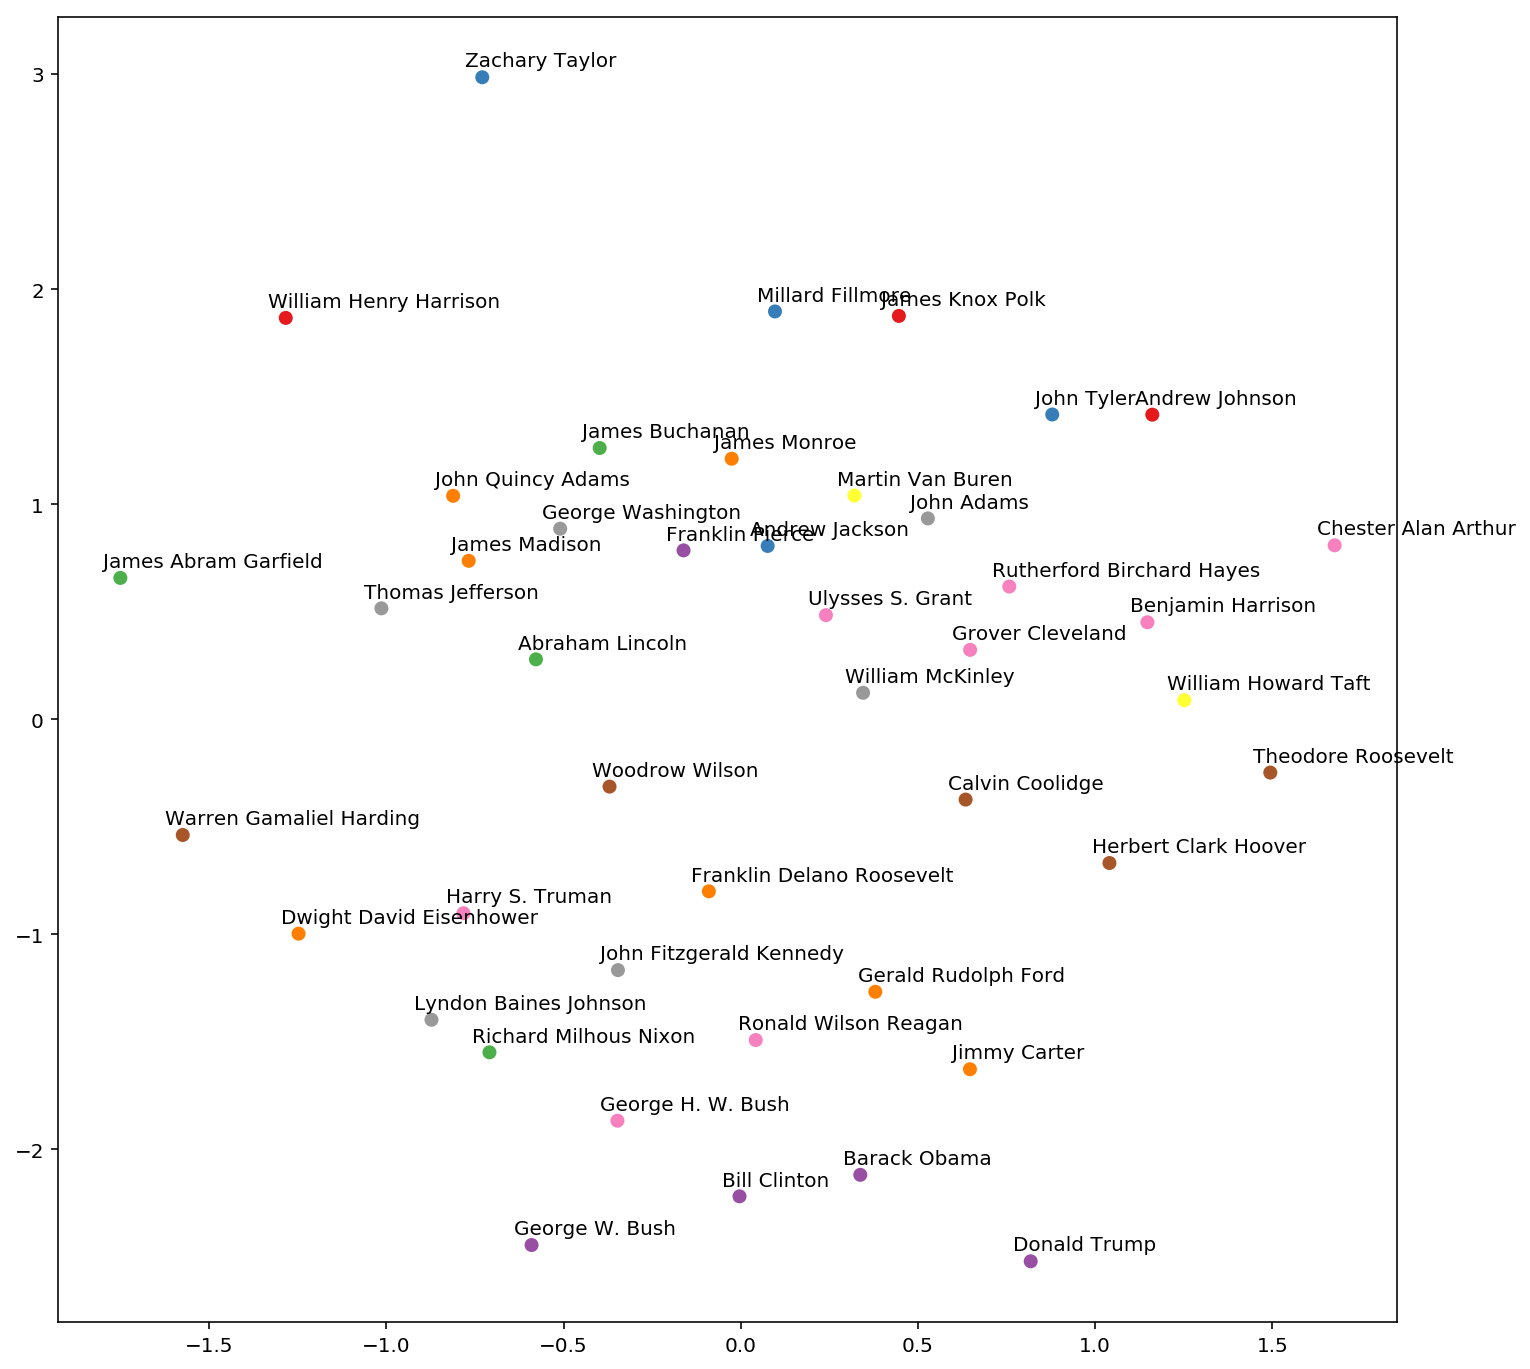

In [49]:
pos_x = [x[0] for x in pos]
pos_y = [x[1] for x in pos]
plt.figure(figsize=(12,12))
plt.scatter(pos_x, pos_y, c = clusters, cmap='Set1')
for i in range(len(speakers)):
    plt.text(pos_x[i]-0.05, pos_y[i]+0.05, speakers[i])
    plt.colormaps()
plt.show()